In [87]:
import pandas as pd

In [88]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

In [89]:
grouped = df.groupby(['left']).mean()
grouped

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [90]:
df[df['left']==1].shape

(3571, 10)

In [91]:
df[df['left']!=1].shape

(11428, 10)

In [92]:
import matplotlib.pyplot as plt

Plot bar charts showing impact of employee salaries on retention

<AxesSubplot:xlabel='salary'>

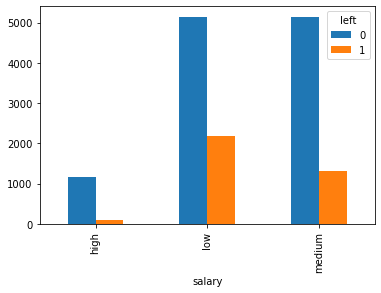

In [93]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

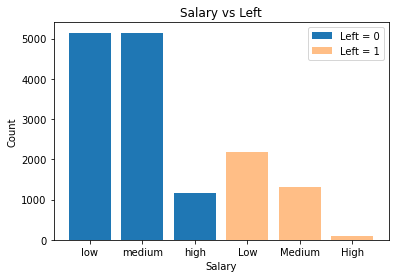

In [94]:
import matplotlib.pyplot as plt

# Verileri gruplandırma
left_0 = df[df['left'] == 0]['salary'].value_counts()
left_1 = df[df['left'] == 1]['salary'].value_counts()

# X ekseni için değerler
x_labels = ['Low', 'Medium', 'High']

# İki grup veri için y ekseni değerleri
y_values_left_0 = [left_0['low'], left_0['medium'], left_0['high']]
y_values_left_1 = [left_1['low'], left_1['medium'], left_1['high']]

# Bar plot oluşturma
plt.bar(left_0.index, y_values_left_0, label='Left = 0')
plt.bar(x_labels, y_values_left_1, label='Left = 1', alpha=0.5)

# Grafik başlığı ve eksen etiketleri
plt.title('Salary vs Left')
plt.xlabel('Salary')
plt.ylabel('Count')

# Legent (açıklama) ekleme
plt.legend()

# Grafiği gösterme
plt.show()

In [95]:
import plotly.graph_objects as go


In [96]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    x=left_0.index,
    y=left_0.values,
    name='Stayed'
))

fig.add_trace(go.Bar(
    x=left_1.index,
    y=left_1.values,
    name='Left'
))

fig.update_layout(
    title='Salary vs Left',
    xaxis_title='Salary',
    yaxis_title='Count'
)

fig.show()

Plot bar charts showing corelation between department and employee retention

<AxesSubplot:xlabel='Department'>

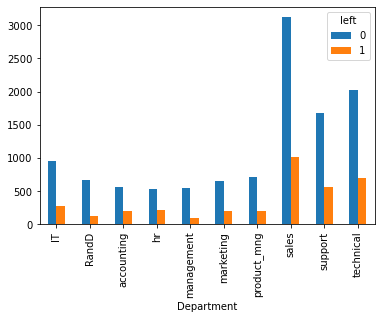

In [97]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [98]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [99]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [100]:
ct = ColumnTransformer([('Department', OneHotEncoder(), [7]), ('Sales', OneHotEncoder(), [8])], remainder = 'passthrough')

In [101]:
X = df.drop(columns=['left'],axis=1)
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low
14995,0.37,0.48,2,160,3,0,0,support,low
14996,0.37,0.53,2,143,3,0,0,support,low
14997,0.11,0.96,6,280,4,0,0,support,low


In [102]:
X = ct.fit_transform(X)
X

array([[0., 0., 0., ..., 3., 0., 0.],
       [0., 0., 0., ..., 6., 0., 0.],
       [0., 0., 0., ..., 4., 0., 0.],
       ...,
       [0., 0., 0., ..., 3., 0., 0.],
       [0., 0., 0., ..., 4., 0., 0.],
       [0., 0., 0., ..., 3., 0., 0.]])

In [103]:
X[:5]

array([[0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 3.80e-01, 5.30e-01, 2.00e+00, 1.57e+02, 3.00e+00,
        0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 8.00e-01, 8.60e-01, 5.00e+00, 2.62e+02, 6.00e+00,
        0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        1.00e+00, 1.10e-01, 8.80e-01, 7.00e+00, 2.72e+02, 4.00e+00,
        0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 7.20e-01, 8.70e-01, 5.00e+00, 2.23e+02, 5.00e+00,
        0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,


In [104]:
y=df.left

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

d:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [108]:
reg.score(X_test,y_test)

0.7933333333333333